In [1]:
import simulation_functions as sim
import visualisation_functions as v
import numpy as np

In [ ]:
directory_pathfile = '/Users/amm3117/Desktop/T-PoP/Percent of lying cars/new simulations/'
sim.full_csv(directory_pathfile)

v.simulation_box_plots('Collaborative ', 100, directory_pathfile+'full_data.csv', 'Percent of lying cars', 'Accuracy')
v.subplots('Collaborative ', directory_pathfile, 100, 'Percent of lying cars')
#v.simulation_violin_plots('Collaborative ', 100, directory_pathfile+'full_data.csv', 'Percent of honest cars', 'Accuracy')

# Visualising Contour plots for lying car simulations

    Percent of lying cars  Percent of coerced cars  Percent False Positives
0                     0.0                      0.0                    0.000
1                     0.0                     10.0                    0.000
2                     0.0                     20.0                    0.000
3                     0.0                     30.0                    0.000
4                     0.0                     40.0                    0.000
..                    ...                      ...                      ...
61                   80.0                     10.0                   79.367
62                   80.0                     20.0                   79.614
63                   90.0                      0.0                   89.403
64                   90.0                     10.0                   89.634
65                  100.0                      0.0                   99.635

[66 rows x 3 columns]
[[ 0.     0.     0.    ... 89.403 89.403 99.635]
 [ 0.     0.    

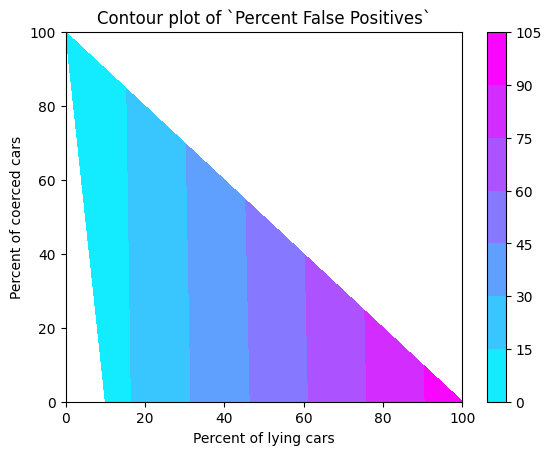

In [74]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

directory_pathfile = '/Users/amm3117/Desktop/T-PoP/Percent of lying cars/new simulations/'
# loading dataset
dataset = sim.full_csv_v2(directory_pathfile)

simulations = pd.DataFrame(dataset)


import numpy as np
import matplotlib.pyplot as plt
x = 'Percent of lying cars'
y = 'Percent of coerced cars'
z = 'Percent False Positives'

df_temp = simulations[[x, y, z]].reset_index(drop=True)
df_temp = df_temp.groupby([x, y]).mean().reset_index()
print(df_temp.sort_values([x, y]))

xlist = df_temp[x].values
ylist = df_temp[y].values
X, Y = np.meshgrid(xlist, ylist)
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        z_val = df_temp[z][
            (df_temp[y] == Y[i, j]) & (df_temp[x] == X[i, j])
        ]
        if z_val.empty:
            Z[i, j] = None
        else:
            Z[i, j] = z_val
print(Z)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, vmin = 0.0000000000001, vmax = 100, cmap='cool')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title(f'Contour plot of `{z}`')
ax.set_xlabel(x)
ax.set_ylabel(y)
plt.show()

In [4]:
simulations

,Unnamed: 0,Simulation number,Percent of coerced cars,Percent of lying cars,Percent of honest cars,Density,Accuracy,True Positives,True Negatives,False Positives,False Negatives,Percent True Positives,Percent True Negatives,Percent False Positives,Percent False Negatives
0,0,0,70.0,0.0,30.0,0.064,79.8,798,0,0,202,79.8,0.0,0.0,20.2
1,1,1,70.0,0.0,30.0,0.064,78.6,786,0,0,214,78.6,0.0,0.0,21.4
2,2,2,70.0,0.0,30.0,0.064,81.0,810,0,0,190,81.0,0.0,0.0,19.0
3,3,3,70.0,0.0,30.0,0.064,79.7,797,0,0,203,79.7,0.0,0.0,20.3
4,4,4,70.0,0.0,30.0,0.064,78.5,785,0,0,215,78.5,0.0,0.0,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,90.0,0.0,10.0,0.064,90.1,901,0,0,99,90.1,0.0,0.0,9.9
96,96,96,90.0,0.0,10.0,0.064,90.5,905,0,0,95,90.5,0.0,0.0,9.5
97,97,97,90.0,0.0,10.0,0.064,90.0,900,0,0,100,90.0,0.0,0.0,10.0
98,98,98,90.0,0.0,10.0,0.064,89.2,892,0,0,108,89.2,0.0,0.0,10.8


In [ ]:
import os
number_of_cars = 1000
target_path = '/Percent of honest cars/new simulations/'
cwd = os.getcwd()
print(cwd + target_path)
simulation_id = 0

f = open("newHONEST_cars_simulation_pathfiles.txt", "w+")

path = sim.make_directory(target_path)

for percent in range(0, 110, 10):
    
    honest_cars = percent/100 * number_of_cars
    print('honest cars: ',honest_cars, 'percentage', percent/100)
    lying_and_coerced = np.round((1 - (percent/100)), 2) * number_of_cars
    print('lying and coerced: ',lying_and_coerced, 'percentage', np.round((1 - (percent/100)), 2))

    for value in range(0, int(lying_and_coerced) + 10, 100):

        lying_cars = lying_and_coerced - value
        print('lying cars: ', lying_cars)

        coerced_cars = value
        print('coerced cars: ', coerced_cars)
    
        number_of_simulations = 100
        interest_variable = 2
        variable_list = [coerced_cars, lying_cars, honest_cars]

        simulation_id += 1
        sim_df = sim.aPoL_simulation(number_of_simulations, int(coerced_cars), int(lying_cars), int(honest_cars), interest_variable, variable_list)

        sim_pathfile = sim.save_simulation(sim_df, path, str(simulation_id) + 'honest_cars' + str(honest_cars)) #TODO: should re run, i realised this too late

        print('pathfile =', sim_pathfile)
        f=open("newHONEST_cars_simulation_pathfiles.txt", "a+")
        f.write(sim_pathfile+'\n')
        f.close()

In [ ]:
directory_pathfile = '/Users/amm3117/Desktop/Proof-of-Location/Proof-of-Location/Percent of honest cars/new simulations/'
sim.full_csv(directory_pathfile)

v.simulation_box_plots('Collaborative ', 100, directory_pathfile+'full_data.csv', 'Percent of honest cars', 'Accuracy')
v.subplots('Collaborative ', directory_pathfile, 100, 'Percent of honest cars')
#v.simulation_violin_plots('Collaborative ', 100, directory_pathfile+'full_data.csv', 'Percent of honest cars', 'Accuracy')